In [1]:
from ipywidgets import widgets
from IPython.display import display
from packtets.geometry import Cell
from packtets import *
from packtets.utils import read_packing, write_packing

def wrapper(foo):
    global res, box
    vx = [v1[x].value for x in range(3)]
    vy = [v2[x].value for x in range(3)]
    vz = [v3[x].value for x in range(3)]
    box = Cell(vx, vy, vz)
    res = pack_tets(box, input_packing=res, time_budget=time_budget.value, verbose=verbose, sample=sample.value)
    print("Packing number is {}".format(len(res)))
    return
    
def reset_packing(foo):
    global res
    res = []
    return

def save_packing(foo):
    global res, box
    write_packing(fname.value, res, box)
    return

def load_packing(foo):
    global res, box
    res, box = read_packing(fname.value)
    for i in range(3):
        v1[i].value = box.vx[i]
        v2[i].value = box.vy[i]
        v3[i].value = box.vz[i]

res = []
box = Cell([1.,0.,0.], [0.,1.,0.], [0., 0., 0.])

time_budget = widgets.BoundedFloatText(value=15, min=0.0, description='Budget (s):')

verbose = False

v1 = [widgets.BoundedFloatText(description="v1", min=0., value=1.),
      widgets.BoundedFloatText(min=0., value=0.),
      widgets.BoundedFloatText(min=0., value=0.),
     ]
v1_opts = widgets.HBox(children=v1)
v2 = [widgets.BoundedFloatText(description="v2", min=0., value=0.),
      widgets.BoundedFloatText(min=0., value=1.),
      widgets.BoundedFloatText(min=0., value=0.),
     ]
v2_opts = widgets.HBox(children=v2)
v3 = [widgets.BoundedFloatText(description="v3", min=0., value=0.),
      widgets.BoundedFloatText(min=0., value=0.),
      widgets.BoundedFloatText(min=0., value=1.),
     ]
v3_opts = widgets.HBox(children=v3)

sample = widgets.Dropdown(
    description="Sampling method",
    options={"Uniform": uniform_sample}, 
    value=uniform_sample)

relax = widgets.Dropdown(
    description="Relaxing method",
    options={"None": no_relax}, 
    value=no_relax)

run = widgets.Button(description='Refine')
run.on_click(wrapper)

reset = widgets.Button(description='Reset packing')
reset.on_click(reset_packing)

fname = widgets.Text(description='Filename', value='packing.txt')

save = widgets.Button(description='Save packing')
save.on_click(save_packing)

load = widgets.Button(description='Load packing')
load.on_click(load_packing)

display(v1_opts, v2_opts, v3_opts, sample, relax, time_budget, run, reset, fname, save, load)

<IPython.core.display.Javascript object>


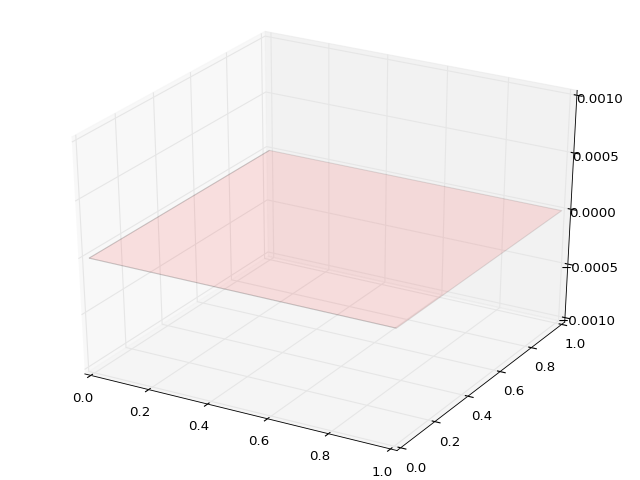

/home/maxhutch/anaconda3/lib/python3.4/site-packages/mpl_toolkits/mplot3d/axes3d.py:722: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


In [2]:
%matplotlib notebook
import mpl_toolkits.mplot3d as a3
import matplotlib.pyplot as plt
from packtets.utils import plot_packing

plot_packing(res, box)